# Proyecto 03 - CASO: ESTADO NUTRICIONAL

Aplicar Estadística Inferencial - Trabajar hasta con 5 variables (seleccionar las variables de su preferencia).

# Importamos las librerias

In [4]:
#cargamos las librerias
import pandas as pd
import seaborn as sns
import statistics as stats # estadística
import numpy as np
import scipy

import matplotlib.pyplot as plt

# Importamos los datos

In [8]:
#Importamos el archivo que trabajamos en el Analisis Exploratorio de Datos (EDA)
from google.colab import files
files.upload()

Saving data_nutricion_2.csv to data_nutricion_2 (1).csv


{'data_nutricion_2 (1).csv': b',talla,edad,peso_kg,circun_cuello,IMC,circun_cintura,cadera,ind_cintura_cadera,ind_cintura_estatura,por_grasa_corporal,masa_corporal_magra_kg,pliegue_cutaneo_BICEPS,pliegue_cutaneo_TRICEPS,pliegue_cutaneo_ESCAPULAR,pliegue_cutaneo_SUPRAILIACO,Grupos\n0,155.7,16.0,71.2,35.7,29.58,90.0,98.0,0.92,0.58,36.45,45.25,13.0,27.0,32.0,34.0,A\n1,166.5,16.0,61.0,31.8,22.36,80.9,100.5,0.8,0.49,28.79,43.44,5.0,19.0,15.0,22.0,A\n2,151.3,16.0,49.1,30.5,21.62,72.0,86.0,0.84,0.48,29.87,34.44,13.0,18.0,18.0,17.0,A\n3,151.7,16.0,54.6,32.6,23.12,73.6,88.4,0.84,0.49,27.87,39.38,5.0,19.0,15.0,18.0,A\n4,160.3,16.0,58.0,30.1,22.26,73.6,97.9,0.81,0.46,30.28,40.44,10.0,19.0,20.0,19.0,A\n5,162.4,16.0,70.8,33.9,26.12,86.5,106.1,0.82,0.53,31.44,48.54,11.0,25.0,18.0,20.0,A\n6,167.0,16.0,47.4,30.5,17.32,66.7,81.5,0.83,0.4,9.69,42.81,3.5,7.0,6.0,6.0,A\n7,158.7,16.0,49.3,31.2,18.98,69.3,83.2,0.83,0.44,26.09,41.24,5.5,12.0,10.5,11.5,A\n8,158.2,16.0,91.0,37.5,35.52,107.5,116.0,0.93,0.68,34.

In [9]:
# Generamos la data con Pandas
data_nutricion = pd.read_csv('data_nutricion_2.csv')
data_nutricion.head()

,Unnamed: 0,talla,edad,peso_kg,circun_cuello,IMC,circun_cintura,cadera,ind_cintura_cadera,ind_cintura_estatura,por_grasa_corporal,masa_corporal_magra_kg,pliegue_cutaneo_BICEPS,pliegue_cutaneo_TRICEPS,pliegue_cutaneo_ESCAPULAR,pliegue_cutaneo_SUPRAILIACO,Grupos
0,0,155.7,16.0,71.2,35.7,29.58,90.0,98.0,0.92,0.58,36.45,45.25,13.0,27.0,32.0,34.0,A
1,1,166.5,16.0,61.0,31.8,22.36,80.9,100.5,0.80,0.49,28.79,43.44,5.0,19.0,15.0,22.0,A
2,2,151.3,16.0,49.1,30.5,21.62,72.0,86.0,0.84,0.48,29.87,34.44,13.0,18.0,18.0,17.0,A
3,3,151.7,16.0,54.6,32.6,23.12,73.6,88.4,0.84,0.49,27.87,39.38,5.0,19.0,15.0,18.0,A
4,4,160.3,16.0,58.0,30.1,22.26,73.6,97.9,0.81,0.46,30.28,40.44,10.0,19.0,20.0,19.0,A


# Visualización de los datos

In [10]:
# Obtenemos las columnas cuantitativas
cols_num = data_nutricion.select_dtypes(include="float64").columns

# Obtenemos las columnas cualitativas
cols_cual = data_nutricion.select_dtypes(include="object").columns

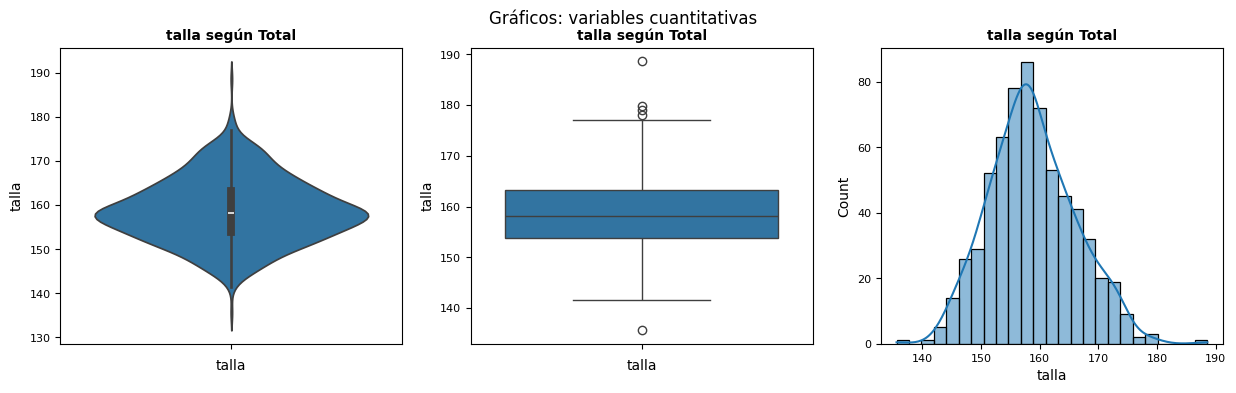

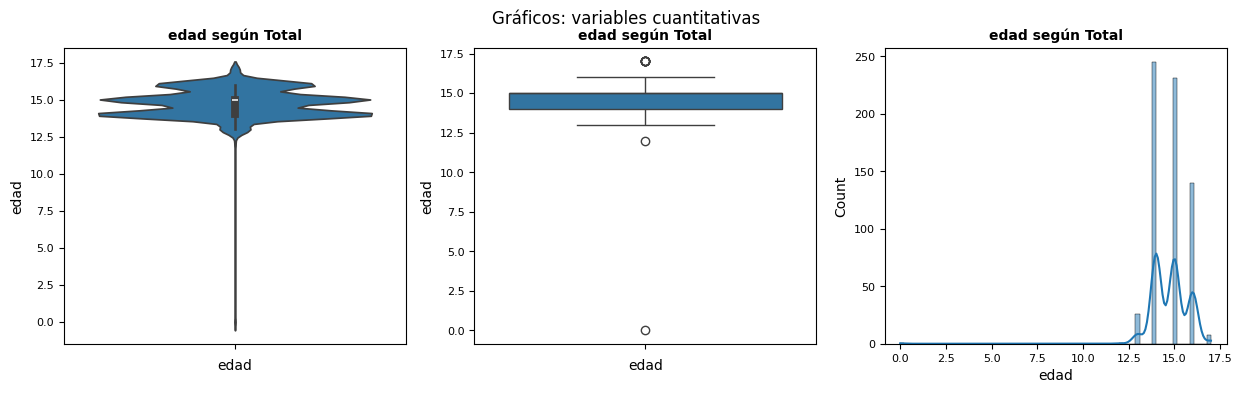

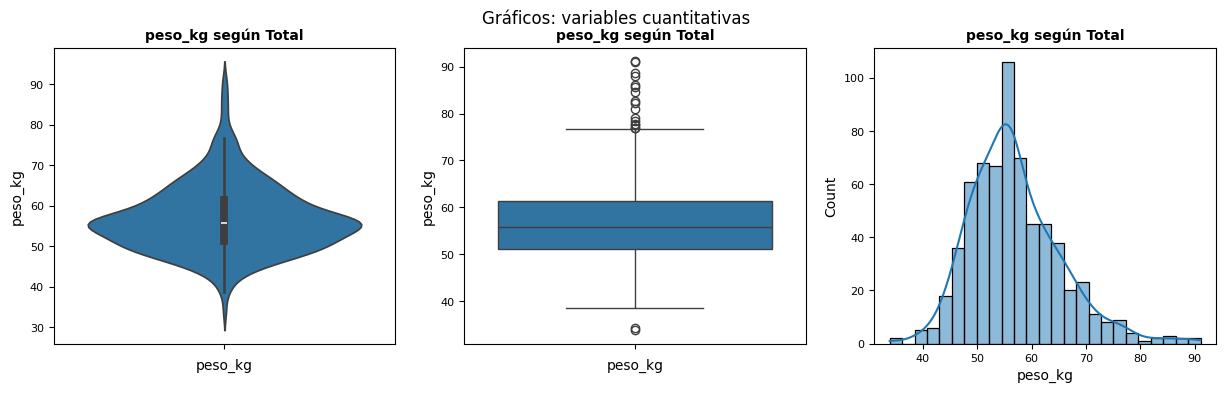

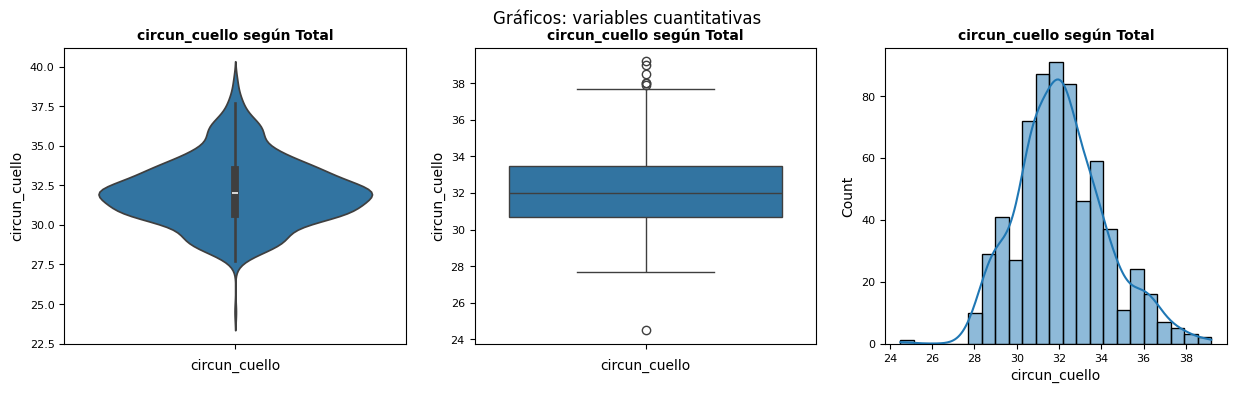

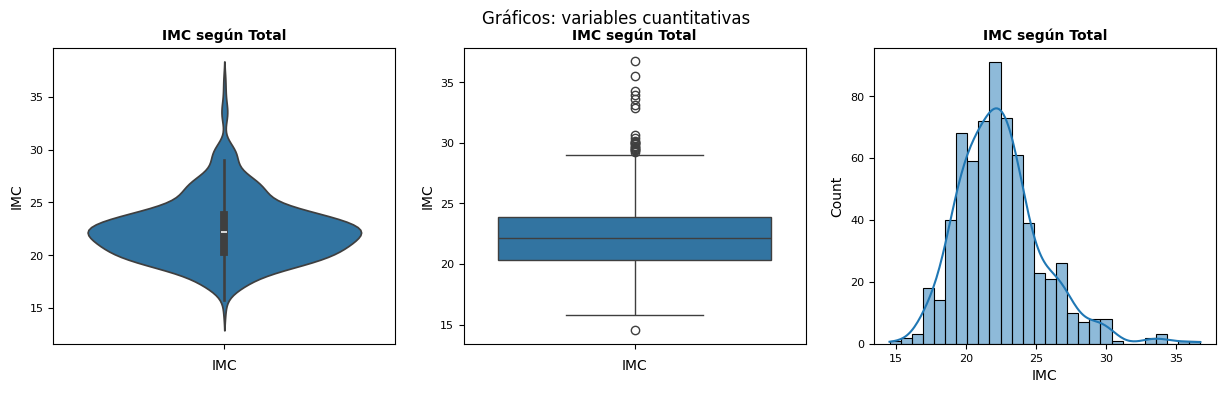

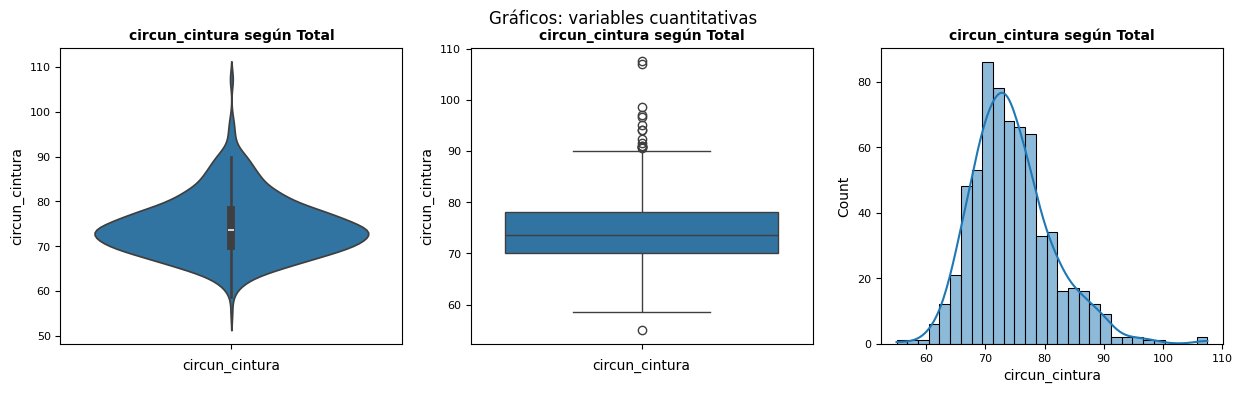

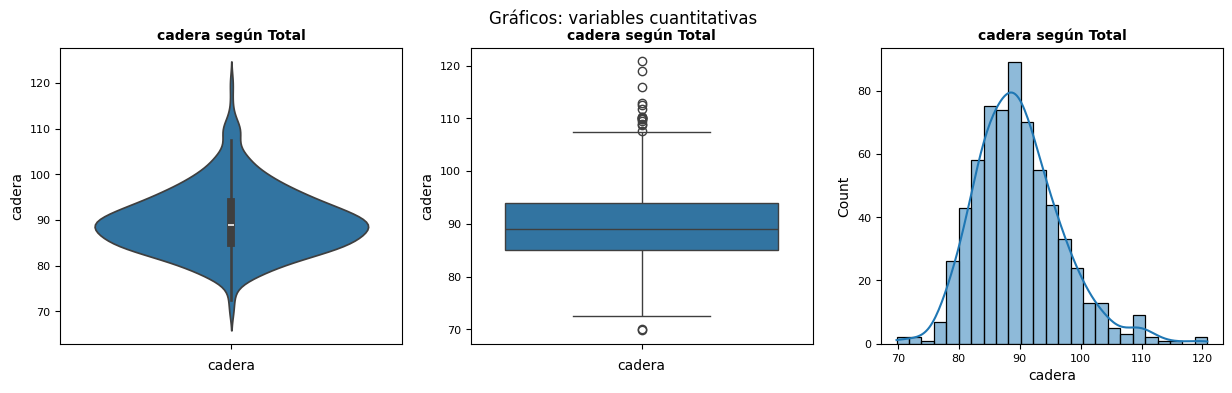

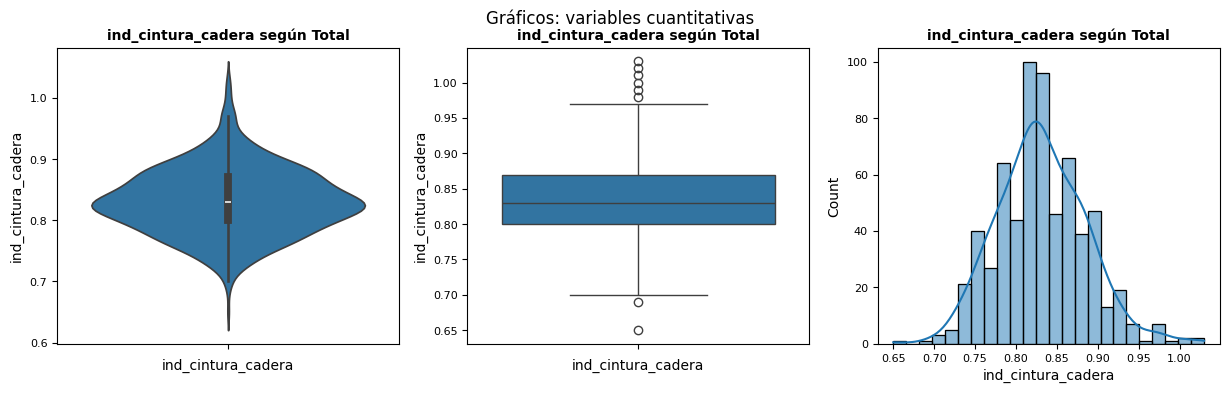

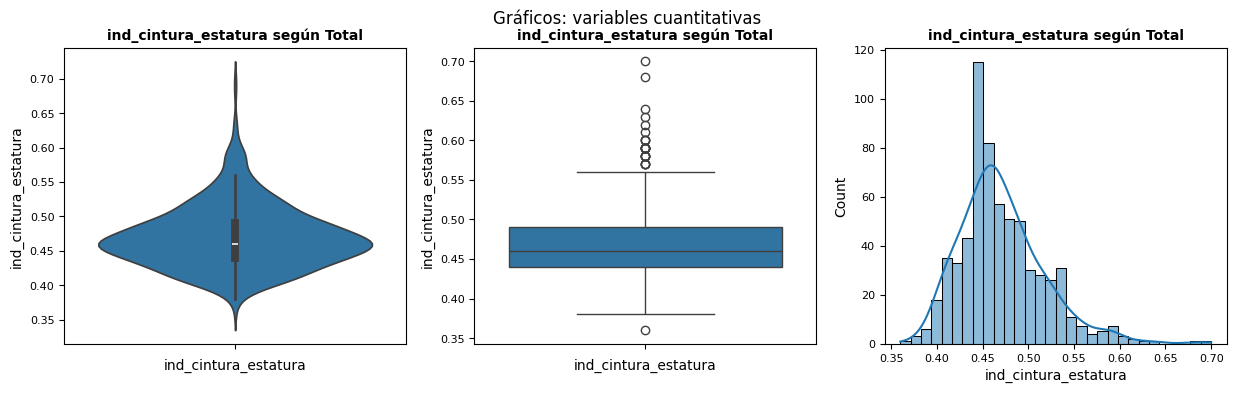

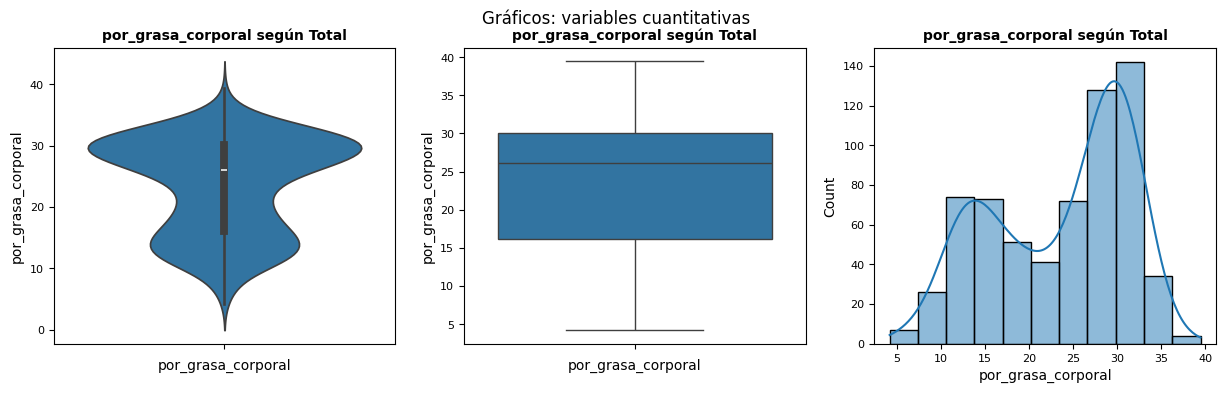

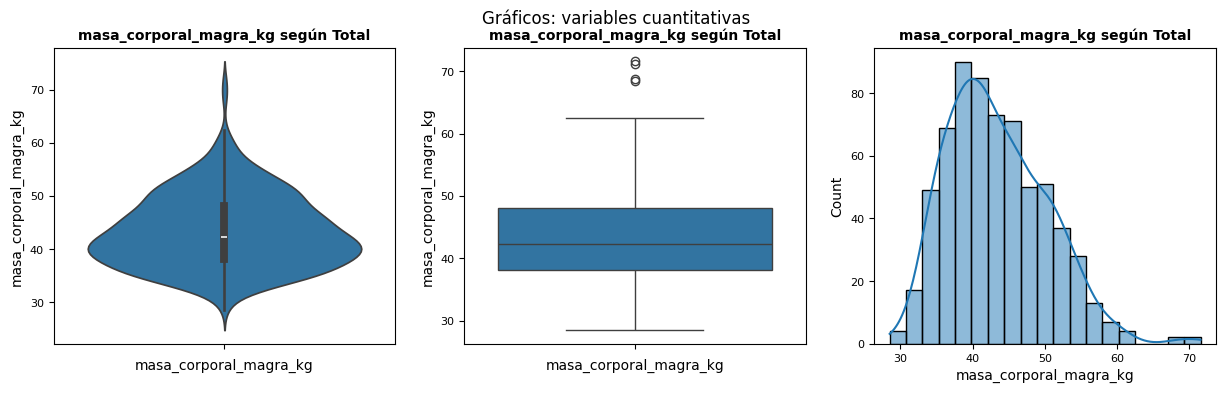

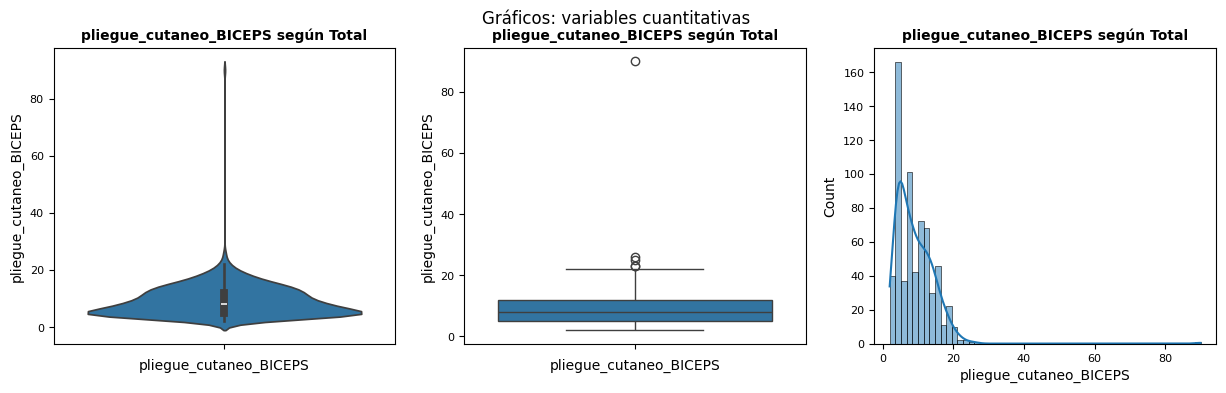

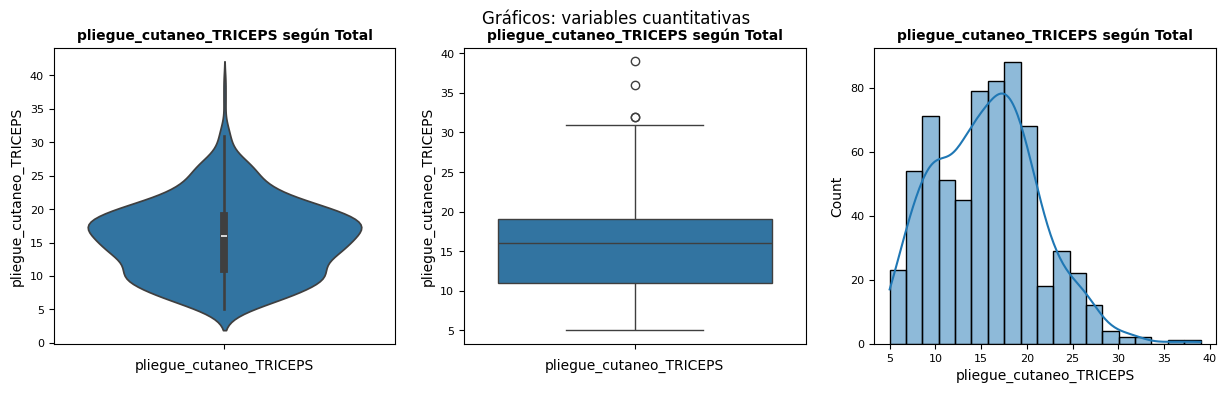

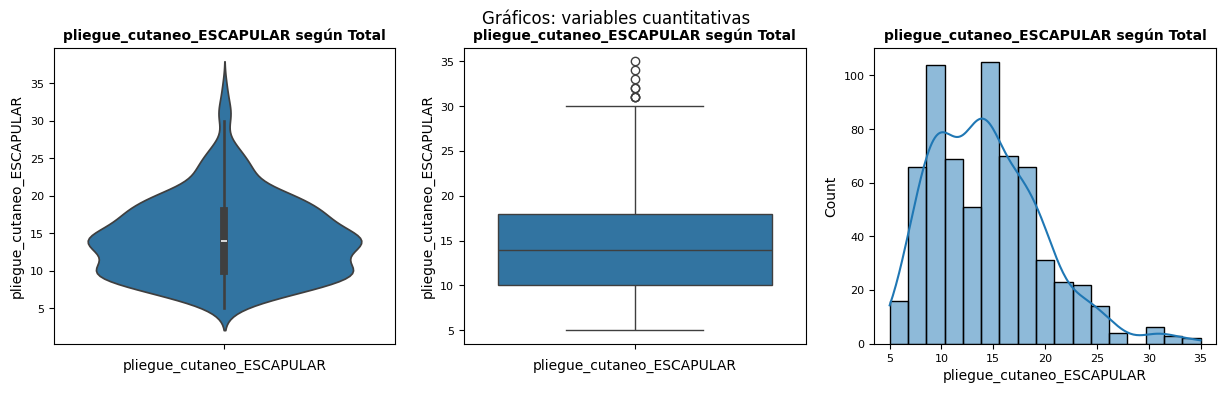

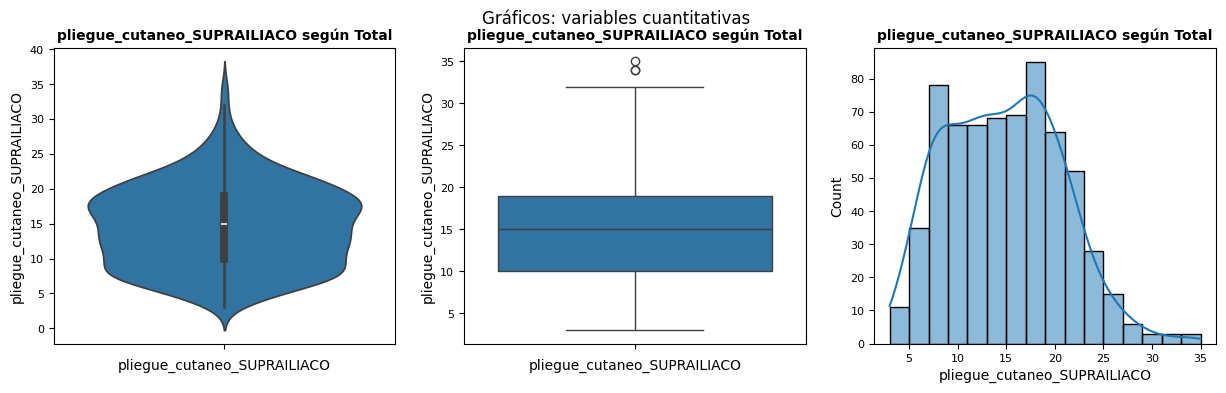

In [11]:
# Graficando las variables cuantitativas

for i, colum in enumerate(cols_num):
    fig, ax = plt.subplots(1, 3, figsize=(15, 3.84))
    fig.suptitle('Gráficos: variables cuantitativas')

    sns.violinplot(y = colum,  data = data_nutricion, ax = ax[0])
    ax[0].set_title(str(colum) + " según Total", fontsize = 10, fontweight = "bold")
    ax[0].tick_params(labelsize = 8)
    ax[0].set_xlabel(colum)

    sns.boxplot(y = colum,  data = data_nutricion, ax = ax[1])
    ax[1].set_title(str(colum) + " según Total", fontsize = 10, fontweight = "bold")
    ax[1].tick_params(labelsize = 8)
    ax[1].set_xlabel(colum)

    sns.histplot(x=colum, data = data_nutricion, kde= True, ax = ax[2])
    ax[2].set_title(str(colum) + " según Total", fontsize = 10, fontweight = "bold")
    ax[2].tick_params(labelsize = 8)
    ax[2].set_xlabel(colum)

# Análisis descriptivo

In [12]:
percentiles = [.1, .25, .5, .75, .9]
Descrip = data_nutricion[cols_num].describe(percentiles=percentiles).T
#Descrip
Descrip.T

,talla,edad,peso_kg,circun_cuello,IMC,circun_cintura,cadera,ind_cintura_cadera,ind_cintura_estatura,por_grasa_corporal,masa_corporal_magra_kg,pliegue_cutaneo_BICEPS,pliegue_cutaneo_TRICEPS,pliegue_cutaneo_ESCAPULAR,pliegue_cutaneo_SUPRAILIACO
count,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000
mean,158.794785,14.756135,56.903221,32.131902,22.421641,74.496319,89.861810,0.831227,0.470445,23.546810,43.373252,9.181748,15.647239,14.383436,14.679448
std,7.316419,1.048901,8.442418,2.108332,3.018819,6.837227,7.183395,0.054271,0.046111,7.849709,6.908098,5.661837,5.692567,5.307465,5.953868
min,135.600000,0.000000,33.900000,24.500000,14.540000,55.000000,69.800000,0.650000,0.360000,4.210000,28.500000,2.000000,5.000000,5.000000,3.000000
10%,149.700000,14.000000,47.600000,29.500000,18.985000,66.820000,81.500000,0.760000,0.420000,12.260000,35.003000,4.000000,8.000000,8.000000,7.000000
25%,153.800000,14.000000,51.200000,30.700000,20.310000,70.000000,85.000000,0.800000,0.440000,16.130000,38.167500,5.000000,11.000000,10.000000,10.000000
50%,158.200000,15.000000,55.800000,32.000000,22.175000,73.600000,89.000000,0.830000,0.460000,26.090000,42.355000,8.000000,16.000000,14.000000,15.000000
75%,163.300000,15.000000,61.450000,33.500000,23.855000,78.000000,94.000000,0.870000,0.490000,30.070000,48.067500,12.000000,19.000000,18.000000,19.000000
90%,169.160000,16.000000,68.060000,34.800000,26.429000,83.500000,99.000000,0.900000,0.530000,32.340000,52.545000,16.000000,23.000000,21.000000,22.000000
max,188.600000,17.000000,91.100000,39.200000,36.710000,107.500000,120.800000,1.030000,0.700000,39.450000,71.570000,90.000000,39.000000,35.000000,35.000000


# Prueba de normalidad
PLANTEAMIENTO DE LAS HIPóTESIS

Ho: Los datos estan normalmente distribuidos

Ha: Los datos no estan normalmente distribuidos

Nivel de significancia = 5% (0.05)

In [13]:
# Importamos las librerias
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro # n <= 50
from scipy.stats import kstest  # n > 50
from scipy.stats import zscore

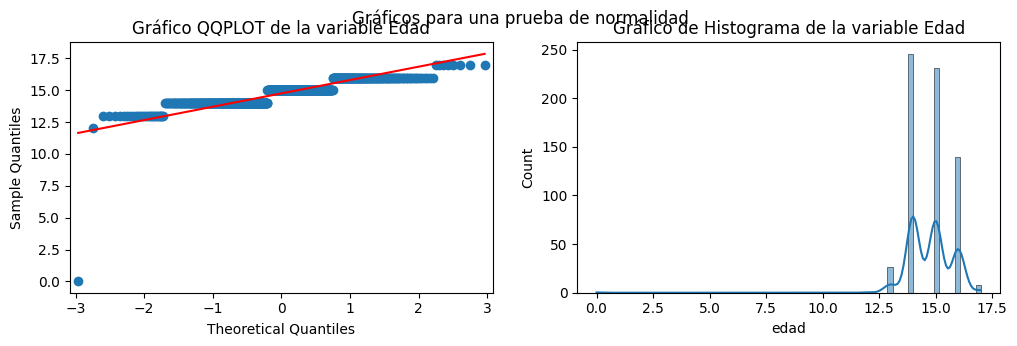

In [14]:
# Graficamos la edad - prueba de normalidad
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 3.25))
fig.suptitle('Gráficos para una prueba de normalidad')

axes[0].set_title('Gráfico QQPLOT de la variable Edad')
axes[1].set_title('Gráfico de Histograma de la variable Edad')

qqplot(data_nutricion['edad'] , line='s', ax=axes[0])
sns.histplot(x='edad', data=data_nutricion, ax=axes[1], kde= True)
plt.show()

In [15]:
#Cuando n > 50

stat2, p2 = kstest(data_nutricion['edad'], 'norm')

print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))

Estadisticos=0.998, p-value=0.000


# Conclusión:
Con un nivel de significancia del 5%, se afirma que, los datos de la variables "Edad" no están normalmente distribuidos.

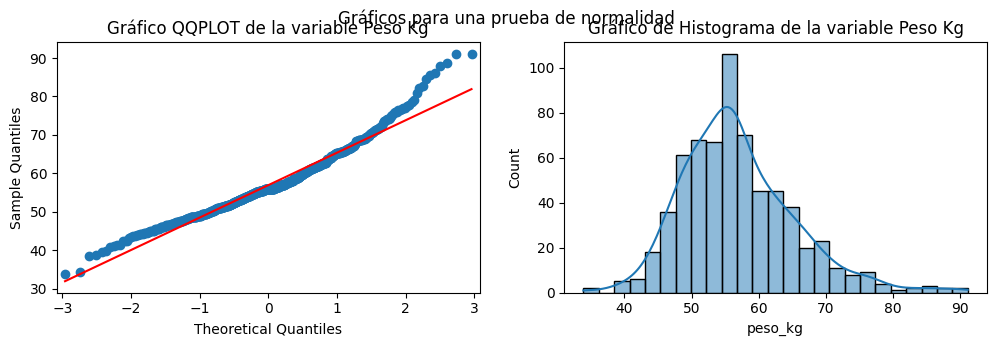

In [18]:
# Graficamos el peso kg - prueba de normalidad
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 3.25))
fig.suptitle('Gráficos para una prueba de normalidad')

axes[0].set_title('Gráfico QQPLOT de la variable Peso Kg')
axes[1].set_title('Gráfico de Histograma de la variable Peso Kg')

qqplot(data_nutricion['peso_kg'] , line='s', ax=axes[0])
sns.histplot(x='peso_kg', data=data_nutricion, ax=axes[1], kde= True)
plt.show()

In [19]:
#Cuando n > 50

stat2, p2 = kstest(data_nutricion['peso_kg'], 'norm')

print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))

Estadisticos=1.000, p-value=0.000


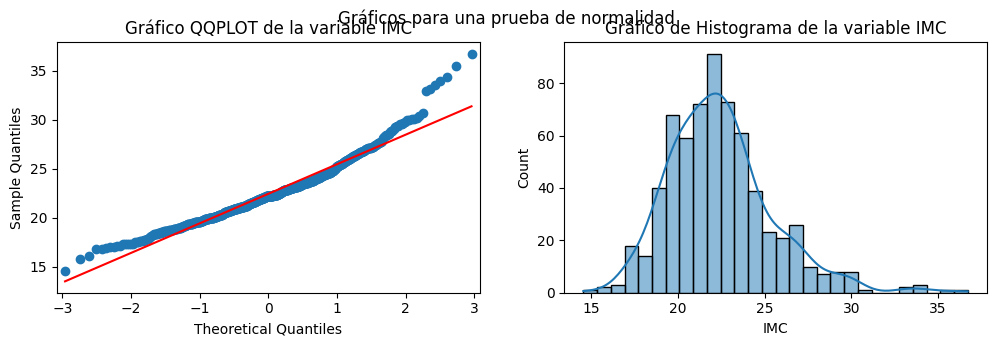

In [20]:
# Graficamos el IMC - prueba de normalidad
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 3.25))
fig.suptitle('Gráficos para una prueba de normalidad')

axes[0].set_title('Gráfico QQPLOT de la variable IMC')
axes[1].set_title('Gráfico de Histograma de la variable IMC')

qqplot(data_nutricion['IMC'] , line='s', ax=axes[0])
sns.histplot(x='IMC', data=data_nutricion, ax=axes[1], kde= True)
plt.show()

In [21]:
#Cuando n > 50

stat2, p2 = kstest(data_nutricion['IMC'], 'norm')

print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))

Estadisticos=1.000, p-value=0.000


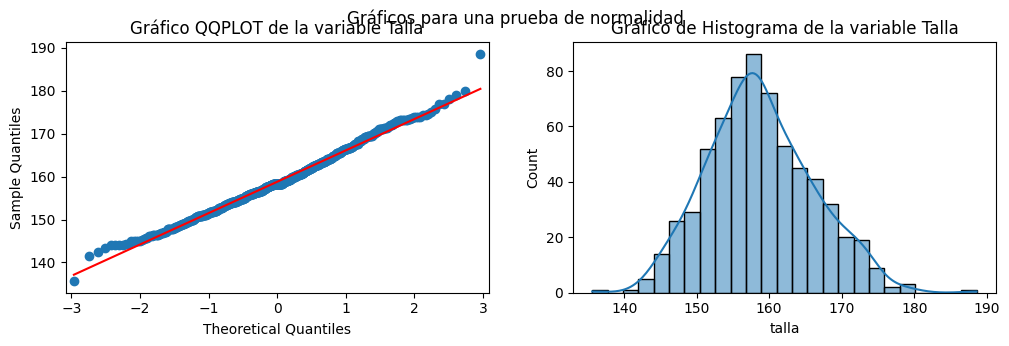

In [22]:
# Graficamos el Talla - prueba de normalidad
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 3.25))
fig.suptitle('Gráficos para una prueba de normalidad')

axes[0].set_title('Gráfico QQPLOT de la variable Talla')
axes[1].set_title('Gráfico de Histograma de la variable Talla')

qqplot(data_nutricion['talla'] , line='s', ax=axes[0])
sns.histplot(x='talla', data=data_nutricion, ax=axes[1], kde= True)
plt.show()

In [23]:
#Cuando n > 50

stat2, p2 = kstest(data_nutricion['talla'], 'norm')

print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))

Estadisticos=1.000, p-value=0.000


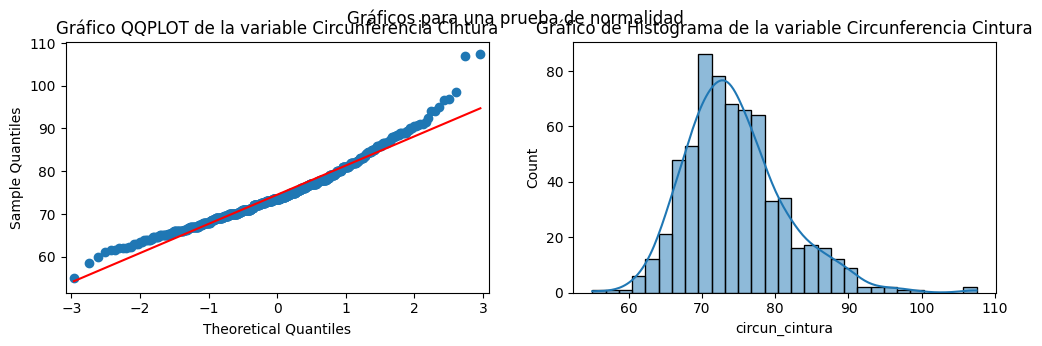

In [24]:
# Graficamos la Circunferencia Cintura - prueba de normalidad
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 3.25))
fig.suptitle('Gráficos para una prueba de normalidad')

axes[0].set_title('Gráfico QQPLOT de la variable Circunferencia Cintura')
axes[1].set_title('Gráfico de Histograma de la variable Circunferencia Cintura')

qqplot(data_nutricion['circun_cintura'] , line='s', ax=axes[0])
sns.histplot(x='circun_cintura', data=data_nutricion, ax=axes[1], kde= True)
plt.show()

In [25]:
#Cuando n > 50

stat2, p2 = kstest(data_nutricion['circun_cintura'], 'norm')

print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))

Estadisticos=1.000, p-value=0.000


# Normalizando variables / transformadas
normalización = ( x – min(x) ) / ( max(x) – min(x) )

Los valores normalizados para todos los demás valores del conjunto de datos estarán entre 0 y 1.

In [27]:
# Normalizamos las variables numéricas

from sklearn.preprocessing import MinMaxScaler

cols_num2 = ['edad','peso_kg','IMC','talla','circun_cintura']

scaler = MinMaxScaler()
data_nutricion_num2_norm = scaler.fit_transform(data_nutricion[cols_num2])
data_nutricion_num2_norm

array([[0.94117647, 0.6520979 , 0.67839423, 0.37924528, 0.66666667],
       [0.94117647, 0.47377622, 0.35272891, 0.58301887, 0.49333333],
       [0.94117647, 0.26573427, 0.31935047, 0.29622642, 0.32380952],
       ...,
       [0.88235294, 0.43706294, 0.37122237, 0.34716981, 0.57142857],
       [0.82352941, 0.95804196, 0.56292287, 0.73018868, 0.58666667],
       [0.82352941, 0.41433566, 0.38475417, 0.42264151, 0.43809524]])

In [28]:
data_nutricion_num2_norm = pd.DataFrame(
    data=data_nutricion_num2_norm,
    columns=cols_num2)
data_nutricion_num2_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   edad            652 non-null    float64
 1   peso_kg         652 non-null    float64
 2   IMC             652 non-null    float64
 3   talla           652 non-null    float64
 4   circun_cintura  652 non-null    float64
dtypes: float64(5)
memory usage: 25.6 KB


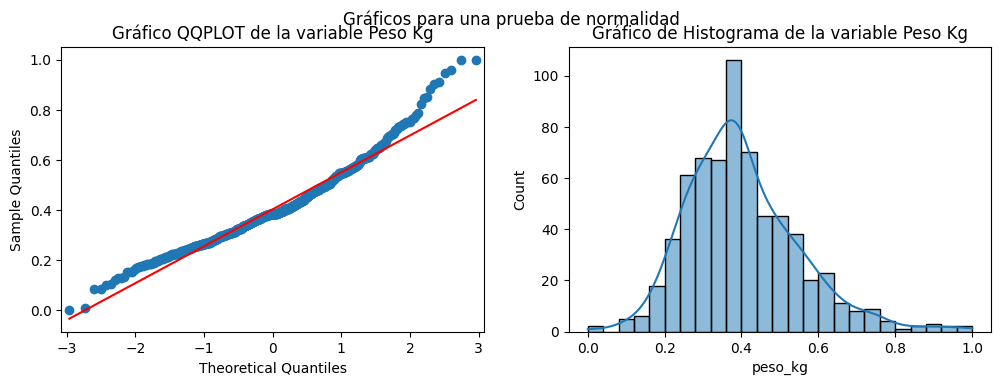

In [29]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 3.7))  # 1 Fila [0]
fig.suptitle('Gráficos para una prueba de normalidad')

axes[0].set_title('Gráfico QQPLOT de la variable Peso Kg')
axes[1].set_title('Gráfico de Histograma de la variable Peso Kg')

qqplot(data_nutricion_num2_norm['peso_kg'] , line='s', ax=axes[0])
sns.histplot(x='peso_kg', data=data_nutricion_num2_norm, ax=axes[1], kde= True)
plt.show()

In [30]:
# Test de Kolmogorov-Smirnov
#Cuando n > 50

stat2, p2 = kstest(data_nutricion_num2_norm['peso_kg'] , 'norm')
print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))

Estadisticos=0.545, p-value=0.000


#  Estandarización de variables

In [31]:
data_nutricion_num2_estand = zscore(data_nutricion[cols_num2], axis=1)
data_nutricion_num2_estand

,edad,peso_kg,IMC,talla,circun_cintura
0,-1.140714,-0.026168,-0.866519,1.679977,0.353424
1,-0.984109,-0.154058,-0.866795,1.791951,0.213010
2,-0.939544,-0.263540,-0.824767,1.823701,0.204149
3,-0.982084,-0.189087,-0.835811,1.805734,0.201249
4,-0.965465,-0.154993,-0.844666,1.819084,0.146039
...,...,...,...,...,...
647,-1.064103,0.288741,-0.935583,1.705570,0.005375
648,-0.999493,-0.257157,-0.803611,1.793922,0.266340
649,-1.037760,-0.163903,-0.883093,1.729122,0.355634
650,-1.125681,0.188939,-0.896547,1.695385,0.137903


In [32]:
data_nutricion_num2_estand = pd.DataFrame(
    data=data_nutricion_num2_estand,
    columns=cols_num2)
data_nutricion_num2_estand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   edad            652 non-null    float64
 1   peso_kg         652 non-null    float64
 2   IMC             652 non-null    float64
 3   talla           652 non-null    float64
 4   circun_cintura  652 non-null    float64
dtypes: float64(5)
memory usage: 25.6 KB


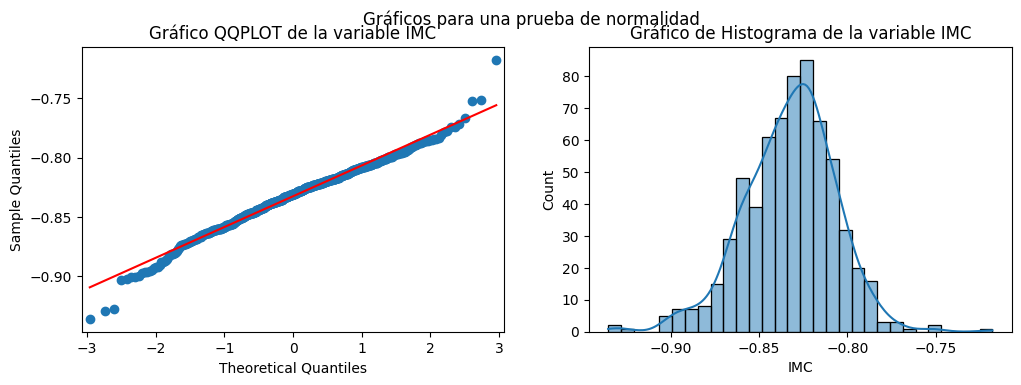

In [33]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 3.7))  # 1 Fila [0]
fig.suptitle('Gráficos para una prueba de normalidad')

axes[0].set_title('Gráfico QQPLOT de la variable IMC')
axes[1].set_title('Gráfico de Histograma de la variable IMC')

qqplot(data_nutricion_num2_estand['IMC'] , line='s', ax=axes[0])
sns.histplot(x='IMC', data=data_nutricion_num2_estand, ax=axes[1], kde= True)
plt.show()

In [35]:
# Test de Kolmogorov-Smirnov
#Cuando n > 50

stat2, p2 = kstest(data_nutricion_num2_estand['IMC'] , 'norm')  #zingreso
print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))

Estadisticos=0.774, p-value=0.000


# Correlaciones

## Prueba de Correlacion: No parametrica


Ho: Las variables A y B son mutuamente independientes.

Ha: Las variables A y B son mutuamente dependientes.

Nivel de significancia: 5%

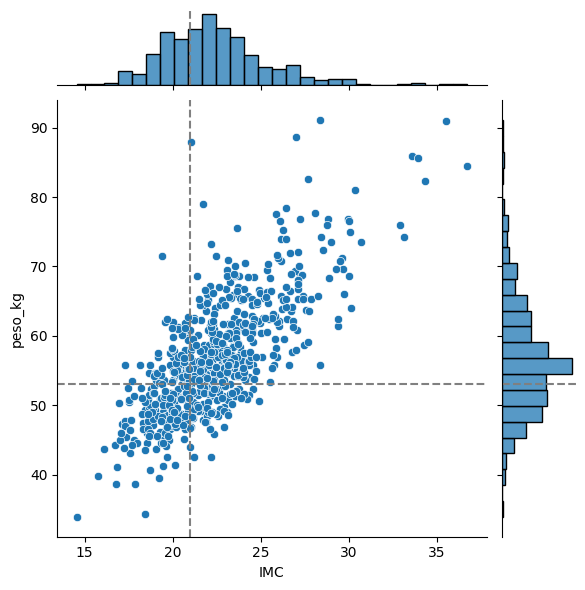

In [53]:
g = sns.JointGrid(x="IMC", y="peso_kg", data=data_nutricion[cols_num2], palette = "ch:s=.50,rot=-.35")
g.plot(sns.scatterplot, sns.histplot)
g.refline(x=21, y=53)

In [56]:
# Correlación spearmanr
from scipy.stats import pearsonr, spearmanr

rho, p = spearmanr(data_nutricion['IMC'], data_nutricion['peso_kg'])

print('Correlación Rho=%.3f, p-value=%.3f' % (rho, p))

Correlación Rho=0.704, p-value=0.000


## Conclusión

Conclusión: Con un nivel de significancia del 5% se afirma que, el peso(kg) y el IMC son mutuamente dependientes, con una correlación de rho = 0.704.